# Next Home: House Price Prediction Models

# Let Random Forest and Gradient Boosting Machine find your next home




In [ ]:
import pandas as pd

## Load Dataset
### Reference:
https://pandas.pydata.org/docs/user_guide/10min.html

In [ ]:
# Loading the training data
train_data = pd.read_csv("train.csv").drop('Id', axis = 1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Counting number of NA's in train data columns
for column in train_data.columns:
    data_type = train_data[column].dtype
    na_count = train_data[column].isna().sum()
    print(f"Column '{column}': Data type - {data_type}, NA values - {na_count}")

Column 'MSSubClass': Data type - int64, NA values - 0
Column 'MSZoning': Data type - object, NA values - 0
Column 'LotFrontage': Data type - float64, NA values - 259
Column 'LotArea': Data type - int64, NA values - 0
Column 'Street': Data type - object, NA values - 0
Column 'Alley': Data type - object, NA values - 1369
Column 'LotShape': Data type - object, NA values - 0
Column 'LandContour': Data type - object, NA values - 0
Column 'Utilities': Data type - object, NA values - 0
Column 'LotConfig': Data type - object, NA values - 0
Column 'LandSlope': Data type - object, NA values - 0
Column 'Neighborhood': Data type - object, NA values - 0
Column 'Condition1': Data type - object, NA values - 0
Column 'Condition2': Data type - object, NA values - 0
Column 'BldgType': Data type - object, NA values - 0
Column 'HouseStyle': Data type - object, NA values - 0
Column 'OverallQual': Data type - int64, NA values - 0
Column 'OverallCond': Data type - int64, NA values - 0
Column 'YearBuilt': Dat

## Exploratory Data Analysis
### Reference:
https://matplotlib.org/stable/api/matplotlib_configuration_api.html

https://seaborn.pydata.org/api.html

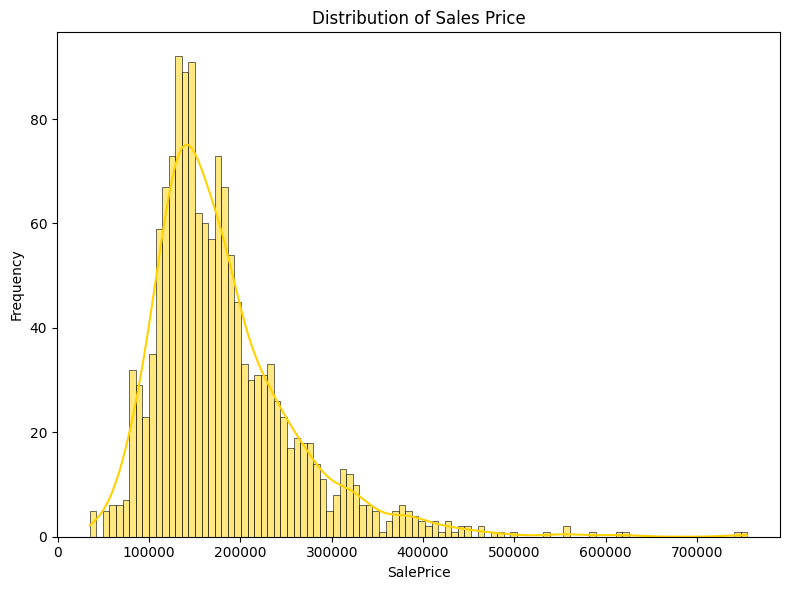

In [ ]:
# Analyzing the Distribution of Sales Price using a Histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(train_data['SalePrice'], kde=True, color='#ffd200', bins=100)
plt.title('Distribution of Sales Price')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Reference:
https://seaborn.pydata.org/api.html

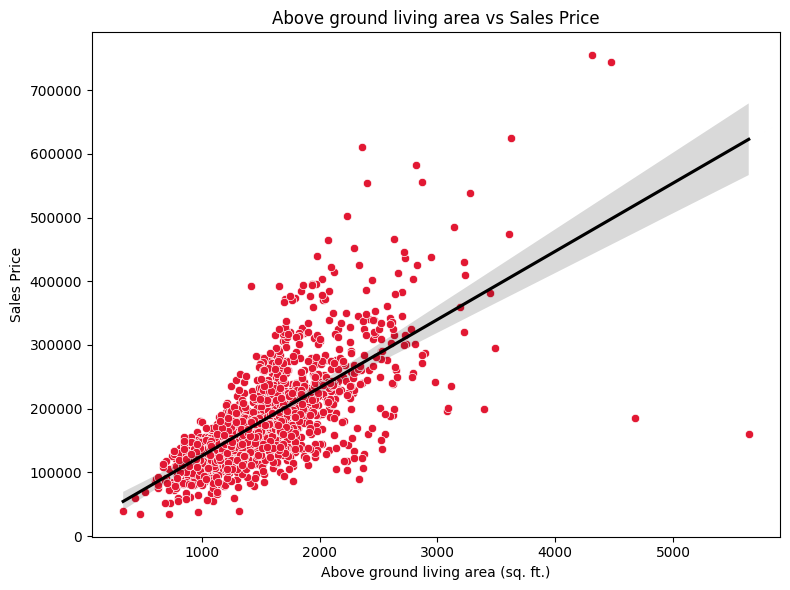

In [ ]:
# Analyzing the relation between the Sales Price and the Above Ground Living
#Area using a Regression Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data, color='#e21833')
sns.regplot(x='GrLivArea', y='SalePrice', data=train_data, scatter=False,
            color='#000000')
plt.title('Above ground living area vs Sales Price')
plt.xlabel('Above ground living area (sq. ft.)')
plt.ylabel('Sales Price')
plt.tight_layout()
plt.show()

### Reference:
https://seaborn.pydata.org/api.html

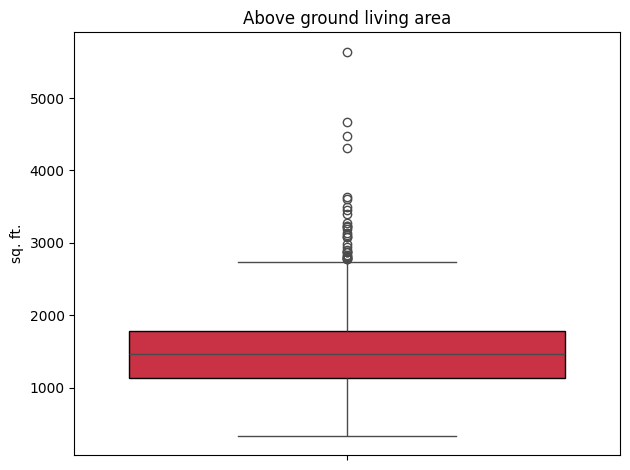

In [ ]:
# Analyzing the distribution of the Above Ground Living Area using a Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=train_data['GrLivArea'], color='#e21833',
            boxprops=dict(edgecolor='black'))
plt.title('Above ground living area')
plt.ylabel('sq. ft.')
plt.tight_layout()
plt.show()


### Reference:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

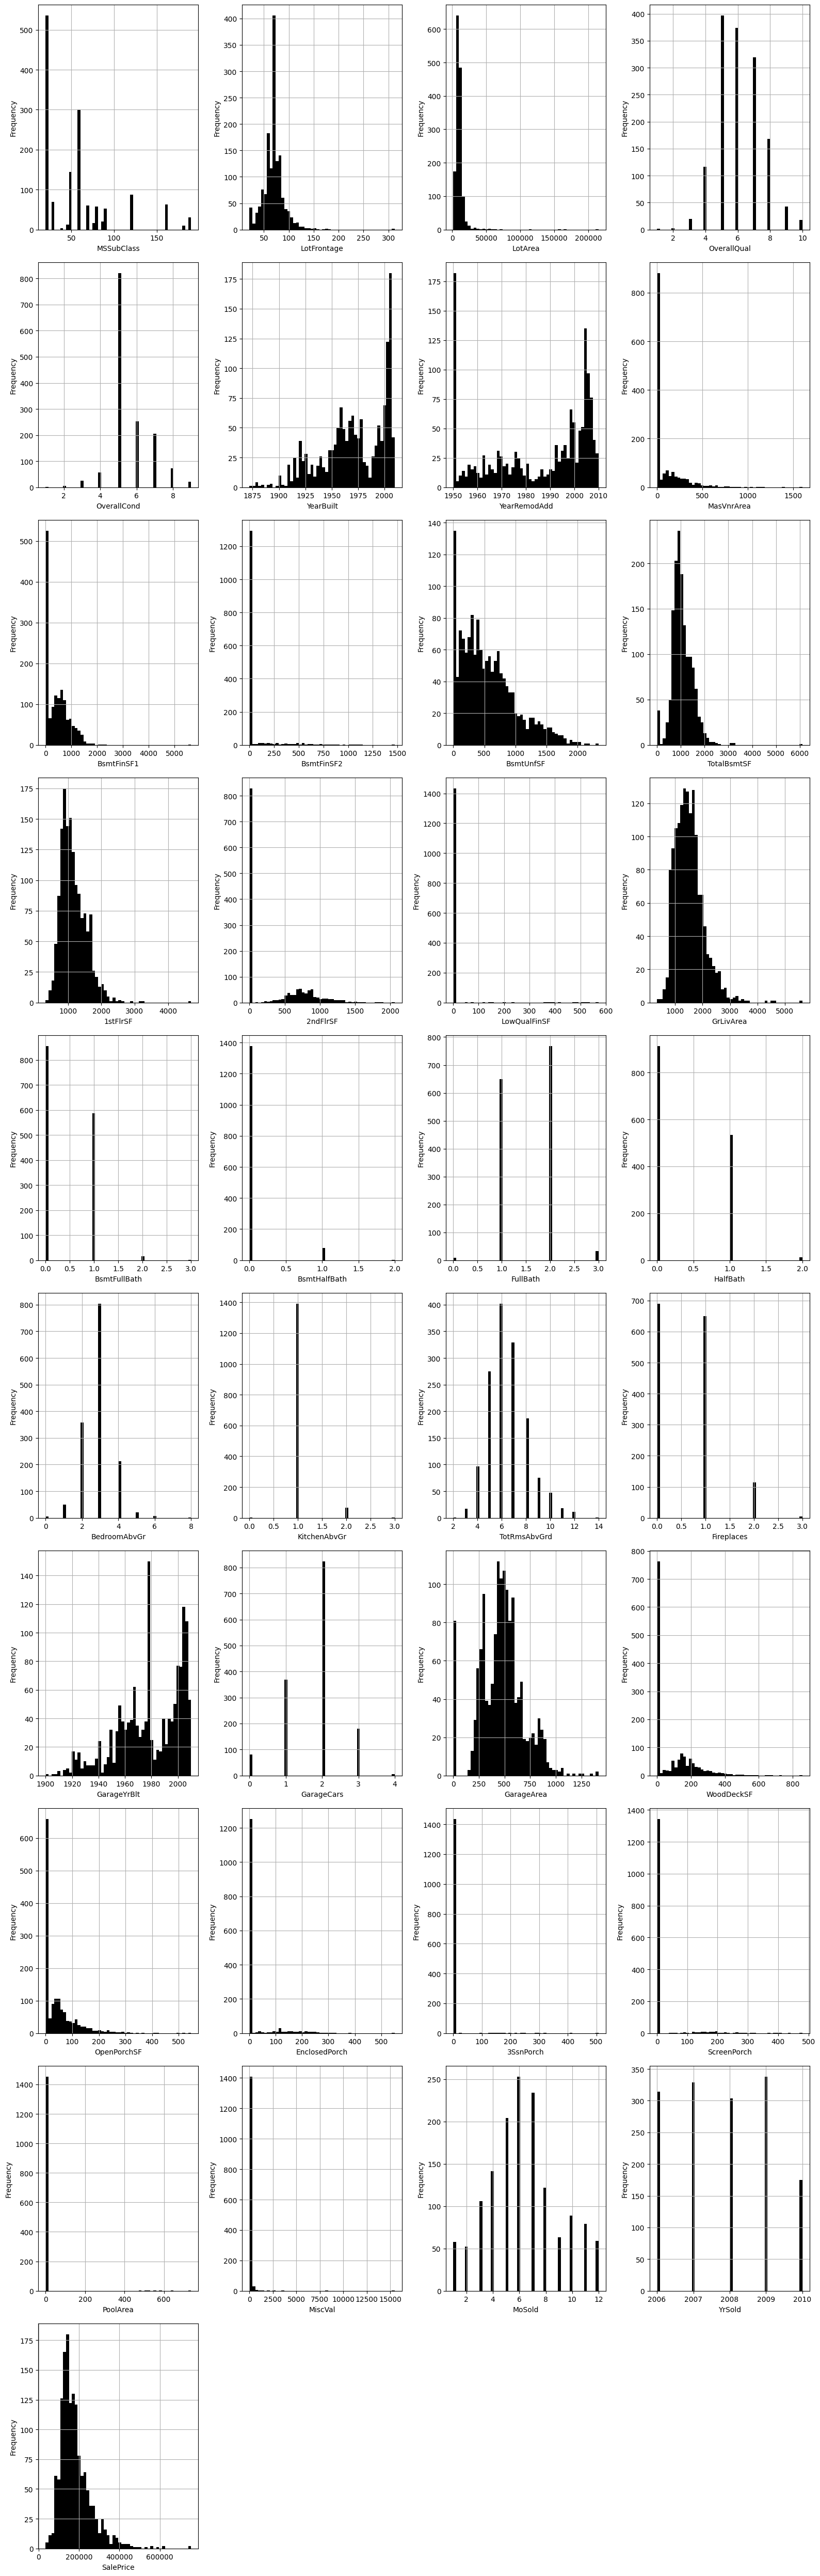

In [ ]:
# Analyzing the distribution of all Numeric Variables using Histograms and
# displaying together as Subplots
import numpy as np

train_data_num = train_data.select_dtypes(include=['float64', 'int64'])

num_columns = train_data_num.columns

num_plots = len(num_columns)
num_rows = (num_plots - 1) // 4 + 1
num_cols = min(num_plots, 4)

plt.figure(figsize=(16, 5 * num_rows))
for i, col in enumerate(num_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    train_data_num[col].hist(bins=50, color='#000000')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()


### Reference:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

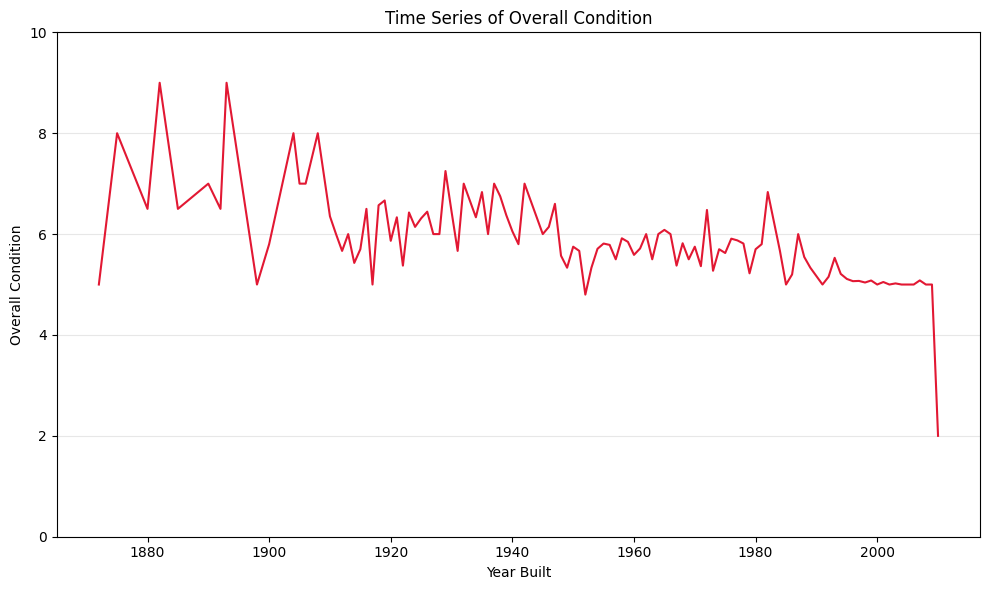

In [ ]:
# Analyzing the Overall Condition of Houses over the Years using a Time Series
time_series =train_data.groupby('YearBuilt')['OverallCond'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(time_series['YearBuilt'], time_series['OverallCond'], linestyle='-',
         color='#e21833')  # Using Hex color code for the line plot
plt.title('Time Series of Overall Condition')
plt.xlabel('Year Built')
plt.ylabel('Overall Condition')
plt.ylim(0, 10)
plt.yticks(range(0, 11, 2))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



### Reference:
https://seaborn.pydata.org/api.html

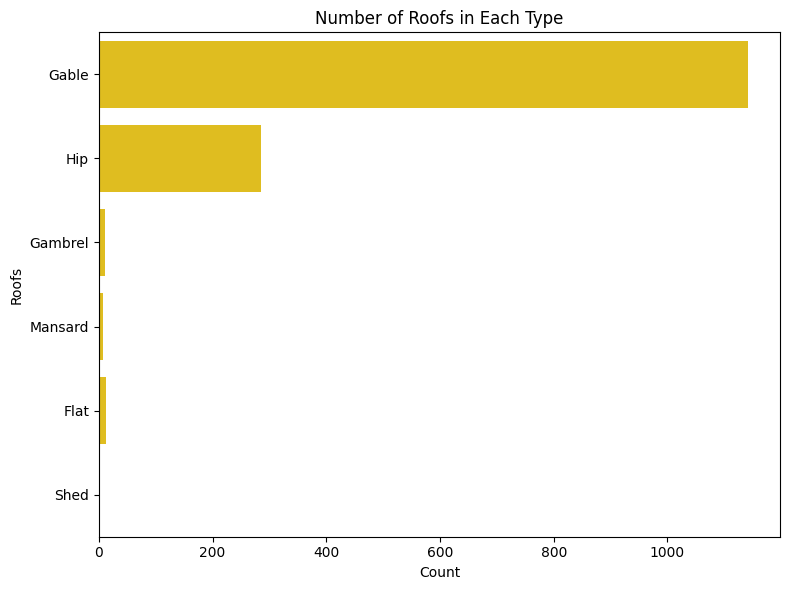

In [ ]:
# Analyzing the Division between the different Types of Roofs using a Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(y="RoofStyle", data=train_data, color="#ffd200")

plt.xlabel('Count')
plt.ylabel('Roofs')
plt.title('Number of Roofs in Each Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Data Processing
###Reference: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
###https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [ ]:
from sklearn.impute import SimpleImputer

# Listing the Columns with missing values for Categorical and Numeric separately
categorical_columns_with_missing = ['Alley', 'MasVnrType', 'BsmtQual',
                                    'BsmtCond', 'BsmtExposure','BsmtFinType1',
                                    'BsmtFinType2', 'Electrical', 'FireplaceQu',
                                    'GarageType', 'GarageFinish', 'GarageQual',
                                    'GarageCond', 'PoolQC', 'Fence',
                                    'MiscFeature']
numerical_columns_with_missing = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Imputing missing values in categorical columns with 'Unknown'
for column in categorical_columns_with_missing:
    train_data[column].fillna('Unknown', inplace=True)

# Imputing missing values in numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
train_data[numerical_columns_with_missing] = numerical_imputer.fit_transform(
    train_data[numerical_columns_with_missing])

# Checking if there are any missing values left
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


## Model training
###This code provides a function for splitting data into training and validation sets using random sampling without replacement.


### Reference: https://www.w3schools.com/python/numpy/numpy_intro.asp

In [ ]:
  # Splitting the Data in Training and Validation Data
  def split_dataset(dataset, test_ratio=0.30):
      num_test = int(test_ratio * len(dataset))
      test_indices = np.random.choice(len(dataset), num_test, replace=False)
      train_indices = np.setdiff1d(np.arange(len(dataset)), test_indices)
      return dataset.iloc[train_indices], dataset.iloc[test_indices]

  data_train, data_valid = split_dataset(train_data)
  print("{} examples in training, {} examples in testing.".format(
      len(data_train), len(data_valid)))

1022 examples in training, 438 examples in testing.


### Reference: https://www.tensorflow.org/decision_forests

In [ ]:
# Installing TF-DF for models
pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully un

### This code prepares the training and validation data for use with a TensorFlow Decision Forest regression model by converting them into TensorFlow datasets, this enables efficient training and potentially improve the overall workflow within the TensorFlow ecosystem.

### Reference: https://www.tensorflow.org/decision_forests


In [ ]:
# Converting the dataset into a TensorFlow dataset
import tensorflow_decision_forests as tfdf

train_df = tfdf.keras.pd_dataframe_to_tf_dataset(
    data_train, label='SalePrice', task = tfdf.keras.Task.REGRESSION)
valid_df = tfdf.keras.pd_dataframe_to_tf_dataset(
    data_valid, label='SalePrice', task = tfdf.keras.Task.REGRESSION)

This code defines a function to calculate Root Mean Squared Error (RMSE) and then uses it to evaluate the performance of two different models from the TensorFlow Decision Forests library on the validation data.



### Reference: https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel

https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/GradientBoostedTreesModel

In [ ]:
from sklearn.metrics import mean_squared_error

# Creating function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_results = {}

# Choosing models from TensorFlow Decision Forest Package
models = [
    tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION),
    tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION)
]

# Fitting models and calculating RMSE
for model in models:
    model.fit(train_df)
    y_pred = model.predict(valid_df)
    y_true = data_valid['SalePrice'].values
    rmse = calculate_rmse(y_true, y_pred)
    rmse_results[type(model).__name__] = rmse

Use /tmp/tmp6fvtnfkv as temporary training directory
Use /tmp/tmp5oyslt8b as temporary training directory
Reading training dataset...
Training dataset read in 0:00:06.858430. Found 1022 examples.
Training model...
Model trained in 0:00:02.570665
Compiling model...
Model compiled.
1/1 [==============================] - 0s 230ms/step
Reading training dataset...
Training dataset read in 0:00:01.128239. Found 1022 examples.
Training model...
Model trained in 0:00:01.370764
Compiling model...
Model compiled.
1/1 [==============================] - 0s 192ms/step


### This code helps to identify the model that achieved the lowest RMSE score on the validation data for our regression task.

### Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html



In [ ]:
# Picking the best model with the lowest RMSE
best_model = min(rmse_results, key=rmse_results.get)
best_rmse = rmse_results[best_model]

print("RMSE for each model:")
for model, rmse in rmse_results.items():
    print(f"{model}: {rmse}")

print(f"\nThe best model based on RMSE is {best_model} with RMSE: {best_rmse}")

RMSE for each model:
RandomForestModel: 23813.70577677228
GradientBoostedTreesModel: 24498.216536128028

The best model based on RMSE is RandomForestModel with RMSE: 23813.70577677228


This code analyzes the RMSE results from the previous step and identifies the best performing model based on the lowest RMSE score.



In [ ]:
# Saving the Best Model
best_model_instance = None
for model in models:
    if type(model).__name__ == best_model:
        best_model_instance = model
        break

best_model_instance.fit(train_df)

Reading training dataset...
Training dataset read in 0:00:00.069678. Found 1022 examples.
Training model...
Model trained in 0:00:02.564769
Compiling model...


Model compiled.


### Load test data
### Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [ ]:
# Loading the test data
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Dropping Id column from Test Data
ids = test_data.pop('Id')
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


This code iterates through the columns of Test Data and  counts the number of missing values in each column.


In [ ]:
# Counting number of NA's in test data columns
for column in test_data.columns:
    data_type = test_data[column].dtype
    na_count = test_data[column].isna().sum()
    print(f"Column '{column}': Data type - {data_type}, NA values - {na_count}")

Column 'MSSubClass': Data type - int64, NA values - 0
Column 'MSZoning': Data type - object, NA values - 4
Column 'LotFrontage': Data type - float64, NA values - 227
Column 'LotArea': Data type - int64, NA values - 0
Column 'Street': Data type - object, NA values - 0
Column 'Alley': Data type - object, NA values - 1352
Column 'LotShape': Data type - object, NA values - 0
Column 'LandContour': Data type - object, NA values - 0
Column 'Utilities': Data type - object, NA values - 2
Column 'LotConfig': Data type - object, NA values - 0
Column 'LandSlope': Data type - object, NA values - 0
Column 'Neighborhood': Data type - object, NA values - 0
Column 'Condition1': Data type - object, NA values - 0
Column 'Condition2': Data type - object, NA values - 0
Column 'BldgType': Data type - object, NA values - 0
Column 'HouseStyle': Data type - object, NA values - 0
Column 'OverallQual': Data type - int64, NA values - 0
Column 'OverallCond': Data type - int64, NA values - 0
Column 'YearBuilt': Dat

This code iterates through the columns in Test Data, separates them based on data type, and then uses a specific imputation strategy for each type:



### Reference:
https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html

In [ ]:
# Listing the Columns with missing values for Categorical and Numeric separately

categorical_columns_with_missing = ['MSZoning', 'Alley', 'Utilities',
                                    'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                    'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                    'BsmtFinType1', 'BsmtFinType2',
                                    'KitchenQual', 'Functional', 'FireplaceQu',
                                    'GarageType', 'GarageFinish', 'GarageQual',
                                    'GarageCond', 'PoolQC', 'Fence',
                                    'MiscFeature', 'SaleType']

numerical_columns_with_missing = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
                                  'GarageCars', 'GarageArea']

# Imputing missing values in categorical columns with 'Unknown'
for column in categorical_columns_with_missing:
    test_data[column].fillna('Unknown', inplace=True)

# Imputing missing values in numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
test_data[numerical_columns_with_missing] = numerical_imputer.fit_transform(
    test_data[numerical_columns_with_missing])

# Checking if there are any missing values left
missing_values = test_data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


### Reference:
https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/pd_dataframe_to_tf_dataset

In [ ]:
# Converting into a TensorFlow dataset, training model and making predictions
test_df = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data, task = tfdf.keras.Task.REGRESSION)

preds = best_model_instance.predict(test_df)

2/2 [==============================] - 1s 24ms/step


### Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [ ]:
# Printing the Prediction Output
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

,Id,SalePrice
0,1461,126025.757812
1,1462,149787.140625
2,1463,181060.656250
3,1464,187159.765625
4,1465,201264.265625


### Reference:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

In [ ]:
# Storing our Prediction Outputs in a csv file
output.to_csv('submissions.csv', index=False)